In [3]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

## Read in Data

In [4]:
with open('all_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
data.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...","[[nan, nan, nan, 0.45009, 0.41456000000000004,...","[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019..."
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...","[[nan, nan, nan, 0.43295, 0.39828, 0.36313, 0....","[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,..."
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...","[[nan, nan, nan, 0.43599, 0.40242, 0.365309999...","[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3..."
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...","[[nan, nan, nan, 0.44292, 0.40849, 0.3726, 0.3...","[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,..."
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[

### Create Mean Catdef Plot

In [6]:
# add mean(catdef) to data
data['mean_catdef'] = data['catdef'].apply(lambda x: x[~np.isnan(x)].mean())
data.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,...,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc,mean_catdef
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...",...,"[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019...",366.141935
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...",...,"[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,...",338.543383
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...",...,"[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3...",332.535937
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...",...,"[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,...",338.018914
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[[nan, nan, nan, 2.8136, 3.1642, 3.0548, 3.106...","[[nan, nan, nan, -0.8199200000000001, -0.85361...",...,"[[nan, nan, nan, 0.071777, 0.0

In [7]:
# get small df for plotting
small_df = data[['Year', 'Month', 'mean_catdef']].copy()
small_df.head()

,Year,Month,mean_catdef
0,2003,1,366.141935
1,2003,2,338.543383
2,2003,3,332.535937
3,2003,4,338.018914
4,2003,5,343.494759


In [8]:
# build out column-wise to work with plotting
plot_df = small_df[['Month']][:12].copy()

for y in small_df['Year'].unique():
    year_sub = small_df[small_df['Year'] == y][['Month', 'mean_catdef']]
    #rename catdef col to year
    year_sub.rename(columns={'mean_catdef': str(y)}, inplace=True)
    plot_df = plot_df.merge(year_sub, on = "Month")
    
plot_df.set_index('Month', drop=True, inplace=True)
plot_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,,,,,
1,366.141935,374.896483,329.619017,315.759733,354.947171,385.737974,398.579841,414.078157,332.415810,404.203000,400.812409,467.420769,460.419824,452.994462
2,338.543383,357.707037,298.152352,314.300112,347.833087,350.934406,371.114955,358.922332,342.927422,380.219459,385.063462,442.166289,446.980834,430.877596
3,332.535937,338.741585,280.230878,299.646261,335.714788,330.570253,350.541667,341.670731,313.746259,368.427020,388.202953,423.746082,444.588612,415.338108
4,338.018914,350.304641,285.632619,278.527038,349.805134,347.754058,368.846973,342.700937,301.354832,354.505798,404.494634,427.017552,455.836259,411.628583
5,343.494759,375.051865,295.263667,310.557972,364.820280,379.991737,382.688566,351.190171,325.224059,386.589612,425.229650,449.007646,453.924441,433.515571
6,399.431049,413.266422,330.362564,335.625323,395.692774,403.465524,398.263648,370.258801,355.832587,409.305233,447.602972,470.222529,454.558497,457.280618
7,429.238671,443.423462,368.630781,376.321189,428.739289,434.854650,426.751247,411.302587,380.894114,440.569848,466.825385,479.030455,486.832005,484.150524
8,443.881259,455.173427,393.436084,396.443485,444.292960,450.389149,455.061585,439.783497,407.638765,452.399184,472.406375,486.073765,495.282529,498.011690
9,452.468800,466.340606,413.999988,414.721317,457.824312,457.148613,472.274883,462.232657,428.021830,467.820385,464.228869,498.099138,507.435921,495.327751


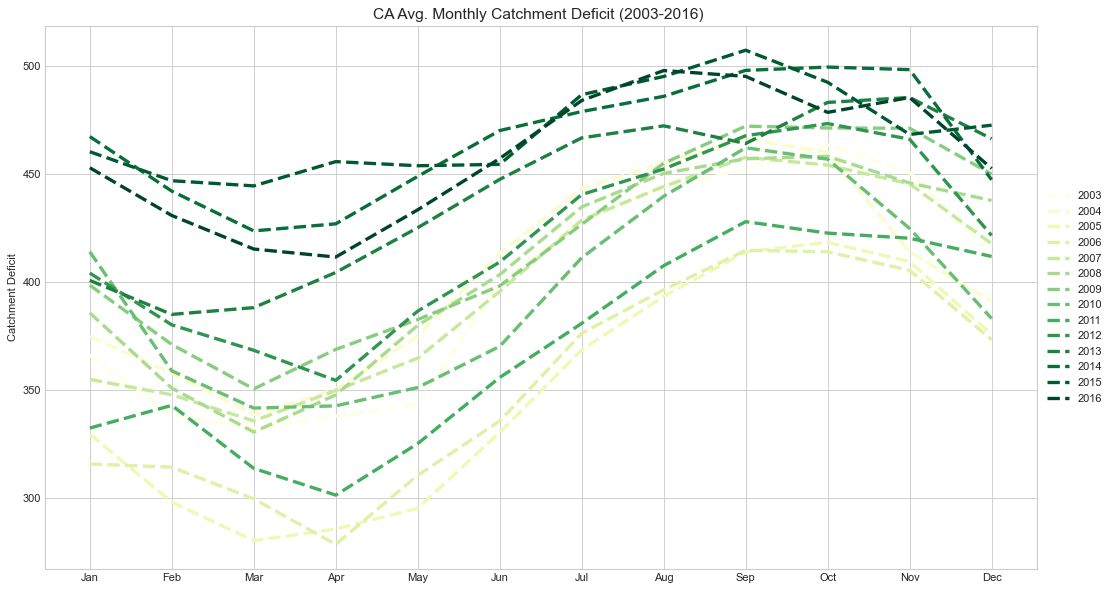

In [9]:
# plot
######
# set up parameters for plot
plt.style.use('seaborn-whitegrid')
n_colors = 14
mycolors = cm.YlGn(np.linspace(0, 1, n_colors))

# labels
month_labs = ['Jan',
             'Feb',
             'Mar',
             'Apr',
             'May',
             'Jun',
             'Jul',
             'Aug',
             'Sep',
             'Oct',
             'Nov',
             'Dec']

# time series for each column
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot_df.columns  
for i, column in enumerate(columns):    
    plt.plot(plot_df.index.values, 
             plot_df[column].values, 
             lw=3, 
             ls="--", 
             color=mycolors[i], 
             label=plot_df.columns[i])    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("CA Avg. Monthly Catchment Deficit (2003-2016) ", fontsize=14)
plt.ylabel('Catchment Deficit')
plt.xticks(np.arange(1,13), month_labs)#, rotation='vertical')
plt.show()

### Create Mean Runoff Plot

In [10]:
data['mean_runoff'] = data['runoff'].apply(lambda x: x[~np.isnan(x)].mean())
data.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,...,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc,mean_catdef,mean_runoff
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...",...,"[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019...",366.141935,0.678753
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...",...,"[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,...",338.543383,0.614314
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...",...,"[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3...",332.535937,0.608035
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...",...,"[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,...",338.018914,0.837034
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[[nan, nan, nan, 2.8136, 3.1642, 3.0548, 3.106...","[[nan, nan, nan, -0.8199200000000001, -0.85361...",...,"[[nan, nan, nan, 0.021049000000000002, 0.02946...","[[nan, nan, nan, 1.9009, 2.3203, 2.3916, 2.124...","[[nan, nan, nan, 0.4333, 0.3896, 0.34993, 0.35...","[[nan, nan, nan, 0.0025691999999999998, 

In [11]:
small_df = data[['Year', 'Month', 'mean_runoff']].copy()
small_df.head()

,Year,Month,mean_runoff
0,2003,1,0.678753
1,2003,2,0.614314
2,2003,3,0.608035
3,2003,4,0.837034
4,2003,5,0.364874


In [12]:
plot_df = small_df[['Month']][:12].copy()

for y in small_df['Year'].unique():
    year_sub = small_df[small_df['Year'] == y][['Month', 'mean_runoff']]
    #rename catdef col to year
    year_sub.rename(columns={'mean_runoff': str(y)}, inplace=True)
    plot_df = plot_df.merge(year_sub, on = "Month")
    
plot_df.set_index('Month', drop=True, inplace=True)
plot_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,,,,,
1,0.678753,0.656646,1.124461,1.346829,0.215676,0.925279,0.232283,0.626680,0.521571,0.369442,0.347174,0.037028,0.079274,0.684291
2,0.614314,1.184256,1.032298,0.833170,0.642776,0.818510,0.662664,0.658903,0.561072,0.215051,0.172227,0.371676,0.314120,0.248151
3,0.608035,0.426162,0.985026,1.521011,0.427361,0.325845,0.515887,0.494538,1.653089,0.860996,0.210560,0.409565,0.091562,0.777058
4,0.837034,0.228548,0.679222,1.474416,0.236755,0.114397,0.178996,0.623815,0.673382,0.538422,0.139861,0.129647,0.086274,0.255692
5,0.364874,0.104214,0.757966,0.281364,0.076008,0.104493,0.239044,0.288133,0.386434,0.066965,0.080517,0.056497,0.125505,0.136763
6,0.013681,0.033728,0.146604,0.178482,0.031675,0.021772,0.191417,0.158931,0.161601,0.059644,0.036290,0.012051,0.047934,0.035961
7,0.060177,0.032407,0.051449,0.098207,0.081129,0.020516,0.050369,0.037615,0.120577,0.093782,0.084584,0.101206,0.090825,0.016302
8,0.105460,0.054456,0.115844,0.024284,0.039416,0.020085,0.025267,0.029617,0.021286,0.060320,0.066193,0.082233,0.033552,0.030440
9,0.043699,0.018109,0.044909,0.039334,0.032190,0.017085,0.013690,0.014157,0.041943,0.031180,0.098636,0.066991,0.020940,0.050666


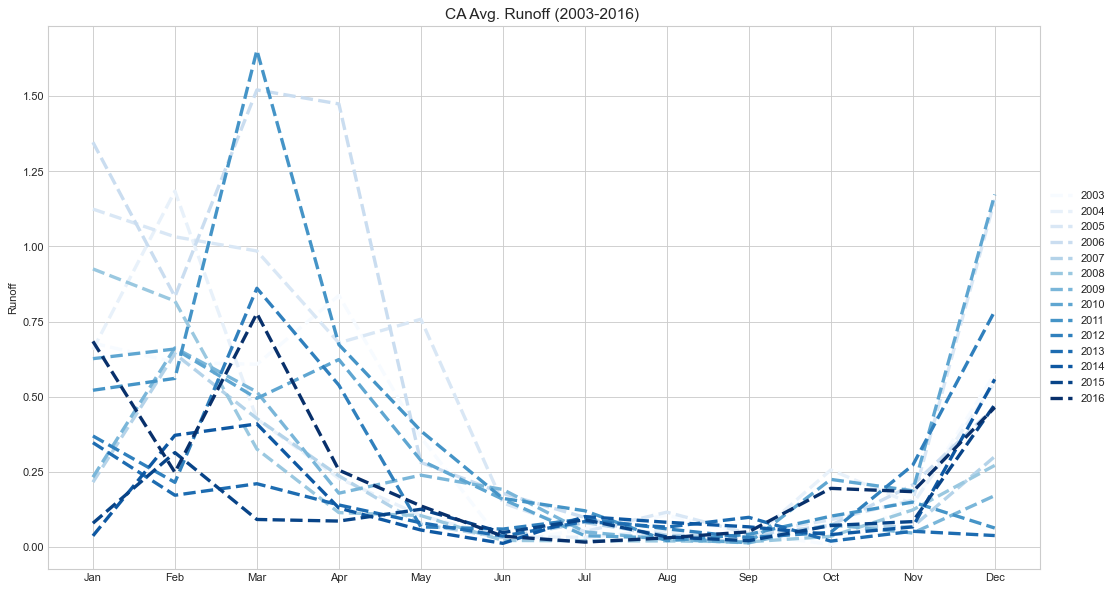

In [13]:
# plot
######
# set up parameters for plot
plt.style.use('seaborn-whitegrid')
n_colors = 14
mycolors = cm.Blues(np.linspace(0, 1, n_colors))

# labels
month_labs = ['Jan',
             'Feb',
             'Mar',
             'Apr',
             'May',
             'Jun',
             'Jul',
             'Aug',
             'Sep',
             'Oct',
             'Nov',
             'Dec']

# time series for each column
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot_df.columns  
for i, column in enumerate(columns):    
    plt.plot(plot_df.index.values, 
             plot_df[column].values, 
             lw=3, 
             ls="--", 
             color=mycolors[i], 
             label=plot_df.columns[i])    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("CA Avg. Runoff (2003-2016) ", fontsize=14)
plt.ylabel('Runoff')
plt.xticks(np.arange(1,13), month_labs)#, rotation='vertical')
plt.show()